## Examples using different affinity methods
Note that you'll be running roberta-large



In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from lib.common.mlm_singleton import init_singleton_scorer
import os

# make sure we init the scorer for all modules first
mlm_scorer = init_singleton_scorer('roberta-large')

# make the huggingface warnings shut up (likely bc of latex call)
os.environ["TOKENIZERS_PARALLELISM"] = "true"

# can import if you want prettier plots; but you'll need a tex installation on your machine
# from rozlib.libs.plotting.utils_latex_matplot import config_matplot_for_latex
# config_matplot_for_latex(12, dpi=100)


/opt/homebrew/Caskroom/miniconda/base/envs/2024_coelm/lib/python3.12/site-packages/memoization/memoization.py:112: SyntaxWarning: Expected custom_key_maker to have the same signature as the function being cached. Call memoization.suppress_warnings() before using @cached to remove this message.
  warnings.warn('Expected custom_key_maker to have the same signature as the function being cached. '


/Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/proj/cxs_are_revealed/src/affinity/tokenization.py:344: UserWarning: using a function that does not assert that words match
  warnings.warn("using a function that does not assert that words match")


global affinities:
[0.456, 0.936, 0.957, 0.402, 0.987, 0.997]
multitoken indices are:
 []
Top predictions for each word are:
[['My', 'His', 'Her', 'Their', 'Our'],
 [' favorite', ' favourite', ' fav', ' current', ' dream'],
 [' band', ' group', ' artist', ' musician', ' album'],
 [' is', '?', ':', ',', ' -'],
 [' Green', ' Third', ' Independence', ' New', ' Training'],
 [' Day', ' River', 'day', 'Day', ' Days']]


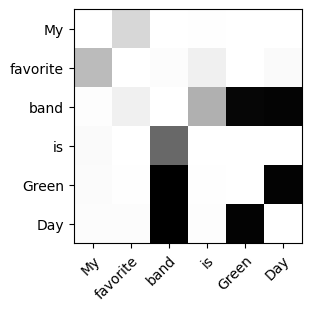

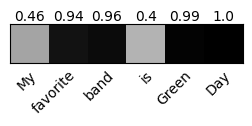

In [6]:
from affinity.plots_new import full_plot_single_sentence_new

"""Green day examples"""

# s1 = "I took a walk down memory lane."
s1 = "My favorite band is Green Day."

f = full_plot_single_sentence_new(
    s1,
    do_print=True,      # whether to print info
    plot_local=True,   # whether to calculate and plot local affinities
    num_preds=5,        # number of preds to print for each slot under single mask
    add_scores_on_top_font_size=10
)




## prepare sentence with mask at correct location Manual use
- If you'd like to just use the affinities, then see src/affinity/corr_matrix_new.py.
- Here is an example of global affinity calculation
- See `get_score_matrix_new()` for local affinity calculation


In [ ]:
from lib.scoring_fns import probability, surprisal
from affinity.corr_matrix_new import get_logits_for_masked_sent, compute_surprisal_for_logits
from affinity.tokenization import Sentence

s = Sentence(s1)    # Sentence class takes care of tokenization

# prepare sentence with mask at correct location
# punctuation is preserved, but will not be part of the mask
# this will error if your word is not actually present or if your word is multi-tokenized
# masked_sent keeps track of what was masked
masked_sent = s.get_input_with_word_masked("Green")

# obtain the logits at the masked position
logits = get_logits_for_masked_sent(masked_sent)

# compute probability of the original word
surp = compute_surprisal_for_logits(
    masked_sent,
    logits,
    probability
    # surprisal     # can also use surprisal
)
print(surp)